In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
albumsdf = pd.read_csv('spotify-albums_data_2023.csv')
artistdf = pd.read_csv('spotify_artist_data_2023.csv')
datadf = pd.read_csv('spotify_data_12_20_2023.csv')
featuresdf = pd.read_csv('spotify_features_data_2023.csv')
tracksdf = pd.read_csv('spotify_tracks_data_2023.csv')

<ipython-input-101-a77284653faf>:3: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  datadf = pd.read_csv('spotify_data_12_20_2023.csv')


In [ ]:
print("Schema for all the dataframes : ")

print(albumsdf.columns)
print(artistdf.columns)
print(datadf.columns)
print(featuresdf.columns)
print(tracksdf.columns)

Schema for all the dataframes : 
Index(['track_name', 'track_id', 'track_number', 'duration_ms', 'album_type',
       'artists', 'total_tracks', 'album_name', 'release_date', 'label',
       'album_popularity', 'album_id', 'artist_id', 'artist_0', 'artist_1',
       'artist_2', 'artist_3', 'artist_4', 'artist_5', 'artist_6', 'artist_7',
       'artist_8', 'artist_9', 'artist_10', 'artist_11', 'duration_sec'],
      dtype='object')
Index(['id', 'name', 'artist_popularity', 'artist_genres', 'followers',
       'genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5',
       'genre_6'],
      dtype='object')
Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'artist_id',
       'duration_sec', 'label', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3'

# Task 2

No. of distinct artists : 36196
No. of distinct genres : genre_0    3137
genre_1    1834
genre_2     996
genre_3     544
genre_4     311
genre_5       0
dtype: int64


<BarContainer object of 10 artists>

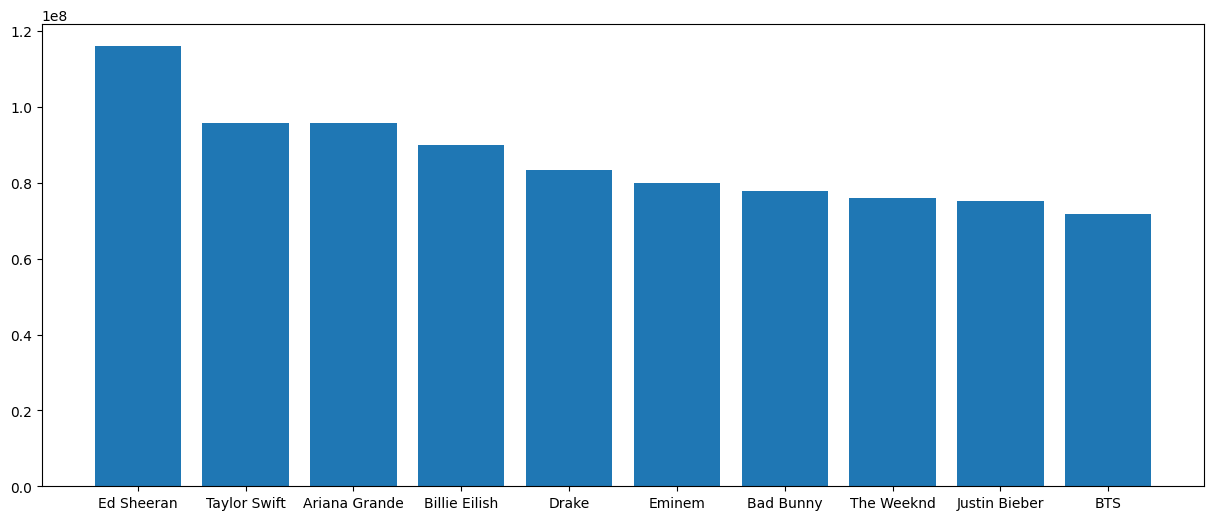

In [ ]:
# Distinct artists in a df columns
distinct_artist_count = artistdf['name'].nunique()
print(f'No. of distinct artists : {distinct_artist_count}')

# Distinct genres
distinct_genre_count = artistdf.iloc[:,5:-1].nunique()
print(f'No. of distinct genres : {distinct_genre_count}')

# Bar graph of top 10 artist with most followers
top_10_art = artistdf.sort_values(by='followers', ascending=False).head(10)
plt.figure(figsize=(15, 6))
plt.bar(top_10_art['name'], top_10_art['followers'],align='center')


In [ ]:
featuresdf.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.460,0.125,11,-8.094,0,0.0371,0.891,0.000,0.1650,0.275,75.639,audio_features,18r5gmlp3vQykXCskNJI0e,spotify:track:18r5gmlp3vQykXCskNJI0e,https://api.spotify.com/v1/tracks/18r5gmlp3vQy...,https://api.spotify.com/v1/audio-analysis/18r5...,89969,5
1,0.621,0.125,10,-19.686,0,0.0376,0.977,0.916,0.1040,0.321,166.048,audio_features,0zfslMAEFfuIjkgxa6tEPc,spotify:track:0zfslMAEFfuIjkgxa6tEPc,https://api.spotify.com/v1/tracks/0zfslMAEFfuI...,https://api.spotify.com/v1/audio-analysis/0zfs...,188793,4
2,0.351,0.125,6,-18.151,0,0.0421,0.985,0.927,0.0972,0.157,100.256,audio_features,0Ah41mjuPtj9TXfElZ59WK,spotify:track:0Ah41mjuPtj9TXfElZ59WK,https://api.spotify.com/v1/tracks/0Ah41mjuPtj9...,https://api.spotify.com/v1/audio-analysis/0Ah4...,191360,4
3,0.638,0.125,4,-15.454,1,0.0548,0.995,0.960,0.0883,0.240,69.976,audio_features,1HQwCt2tFgnYyPzY019ZpI,spotify:track:1HQwCt2tFgnYyPzY019ZpI,https://api.spotify.com/v1/tracks/1HQwCt2tFgnY...,https://api.spotify.com/v1/audio-analysis/1HQw...,190717,4
4,0.857,0.125,7,-18.150,1,0.4470,0.904,0.926,0.0948,0.608,159.953,audio_features,4j1lMVFE9H5Av6wxRhteSA,spotify:track:4j1lMVFE9H5Av6wxRhteSA,https://api.spotify.com/v1/tracks/4j1lMVFE9H5A...,https://api.spotify.com/v1/audio-analysis/4j1l...,213750,4


In [ ]:
def getstats(col):
  print(f'Min Value : {min(col)}')
  print(f'Max Value : {max(col)}')
  print(f'Mean Value : {np.mean(col)}')
  print(f'Median Value : {np.median(col)}')
  print(f'Standard Deviation : {np.std(col)}')

In [ ]:
numeric_columns = featuresdf.columns[featuresdf.apply(pd.to_numeric, errors='coerce').notna().any()]
columns_with_nulls = featuresdf.columns[featuresdf.isnull().any()]
columns_to_pass = set(numeric_columns).union(columns_with_nulls)

for col in columns_to_pass:
    print(f'\n\n\n\nStats for {col}')
    getstats(featuresdf[col])





Stats for time_signature
Min Value : 0
Max Value : 5
Mean Value : 3.876830582134249
Median Value : 4.0
Standard Deviation : 0.5158044074692841




Stats for loudness
Min Value : -60.0
Max Value : 3.744
Mean Value : -11.15553392968008
Median Value : -9.467
Standard Deviation : 6.4727507885614495




Stats for energy
Min Value : 0.0
Max Value : 1.0
Mean Value : 0.5283448414295889
Median Value : 0.544
Standard Deviation : 0.2642306099490682




Stats for liveness
Min Value : 0.0
Max Value : 1.0
Mean Value : 0.19499088443137824
Median Value : 0.123
Standard Deviation : 0.17259646320322072




Stats for valence
Min Value : 0.0
Max Value : 1.0
Mean Value : 0.4572400329265119
Median Value : 0.445
Standard Deviation : 0.26699959741455287




Stats for duration_ms
Min Value : 1719
Max Value : 5407669
Mean Value : 216333.54478306917
Median Value : 205453.0
Standard Deviation : 118836.98615107208




Stats for tempo
Min Value : 0.0
Max Value : 249.428
Mean Value : 118.72911397998686
Median Va

<Axes: >

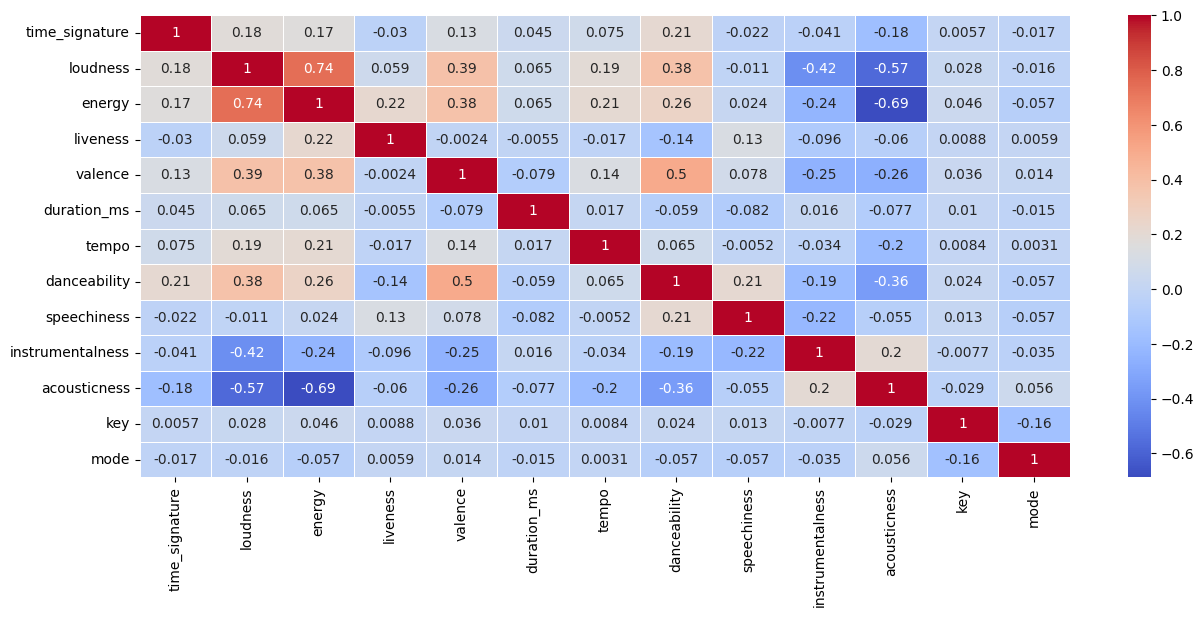

In [ ]:
columns_to_pass = list(columns_to_pass)
numeric_df = featuresdf[columns_to_pass]


import seaborn as sns
plt.figure(figsize=(15, 6))
data = numeric_df.corr()
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=0.5)

In [ ]:
tracksdf.head()

,id,track_popularity,explicit
0,02MBhqgR7WeeI4ZfB6Lo0i,0,False
1,5j4M4gLYuUy9PVw0vsXWyq,0,False
2,46EucLPJpx0QM3SCjzzdP0,0,False
3,4nK2LvW3osgDT89S38Mcg6,0,False
4,1Pq37WIQZDG7yNFnY5IbqG,0,False


In [ ]:
top_ten_songs = tracksdf.sort_values(by='track_popularity', ascending=False).head(10)
top_ten_songs

,id,track_popularity,explicit
385079,1BxfuPKGuaTgP7aM0Bbdwr,99,False
385080,0bYg9bo50gSsH3LtXe2SQn,99,False
385078,3vkCueOmm7xQDoJ17W1Pm3,98,False
438937,7iQXYTyuG13aoeHxGG28Nh,97,True
438936,4MjDJD8cW7iVeWInc2Bdyj,96,True
438935,6uIIdjYTxxpWOyWuVXrKQO,95,True
385077,0lizgQ7Qw35od7CYaoMBZb,95,False
385073,1Iq8oo9XkmmvCQiGOfORiz,94,False
385076,4Dvkj6JhhA12EX05fT7y2e,94,False
385075,6wf7Yu7cxBSPrRlWeSeK0Q,94,False


In [ ]:
albumsdf.head()

,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
0,Amazing Grace,6mN8nzCXWUeT5LWEcG1Utx,5,555521,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.521
1,Silent Night,58sgjtx3FOnBBEOd3BQE6C,8,535041,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.041
2,Ancient Canyons,45tQJhm0WSk5VWMZK3FsLK,1,545855,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545.855
3,Pacha Mama Medicina,3VFD7QqkJSg0OR6yBwKl7A,6,305241,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.241
4,Palace Of Light,7LwJV5BEIC9BQnzvaBSyCc,7,351060,album,NaN,9,Deep Peace Experience,2015-06-09 00:00:00 UTC,Mountain Music Inc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,351.060


In [ ]:
distinct_albums_count = albumsdf['album_name'].nunique()
print(f'No. of distinct albums : {distinct_albums_count}')

No. of distinct albums : 63485


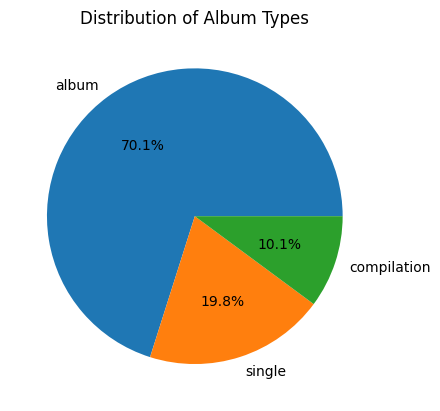

In [ ]:
album_types = albumsdf['album_type'].value_counts()
plt.pie(album_types, labels=album_types.index, autopct='%1.1f%%')
plt.title('Distribution of Album Types')
plt.show()

In [ ]:
tracks = albumsdf.sort_values(by='total_tracks', ascending=False).head(1)
tracks

,track_name,track_id,track_number,duration_ms,album_type,artists,total_tracks,album_name,release_date,label,...,artist_3,artist_4,artist_5,artist_6,artist_7,artist_8,artist_9,artist_10,artist_11,duration_sec
158015,Chapter 49 - The Ultimate Horror Collection: 6...,7ysPL1Aj3GWsvAAWaseeOs,49,307809,album,NaN,984,The Ultimate Horror Collection: 60+ Novels And...,2022-08-18 00:00:00 UTC,SNR Audio,...,Mary Shelley,M.R. James,Robert Louis Stevenson,Henry James,NaN,NaN,NaN,NaN,NaN,307.809


In [ ]:
unique_albums = albumsdf.drop_duplicates(subset='album_name')
popular_albums = unique_albums.sort_values(by='album_popularity', ascending=False).head(10)['album_name']
popular_albums

,album_name
438951,Nadie Sabe Lo Que Va A Pasar Mañana
438930,1989 (Taylor'S Version)
438889,Un Verano Sin Ti
438797,Speak Now (Taylor'S Version)
438750,Harry'S House
438688,1989 (Taylor'S Version) [Deluxe]
438649,The Land Is Inhospitable And So Are We
438550,Astroworld
438538,Fine Line
438584,The Christmas Song (Expanded Edition)


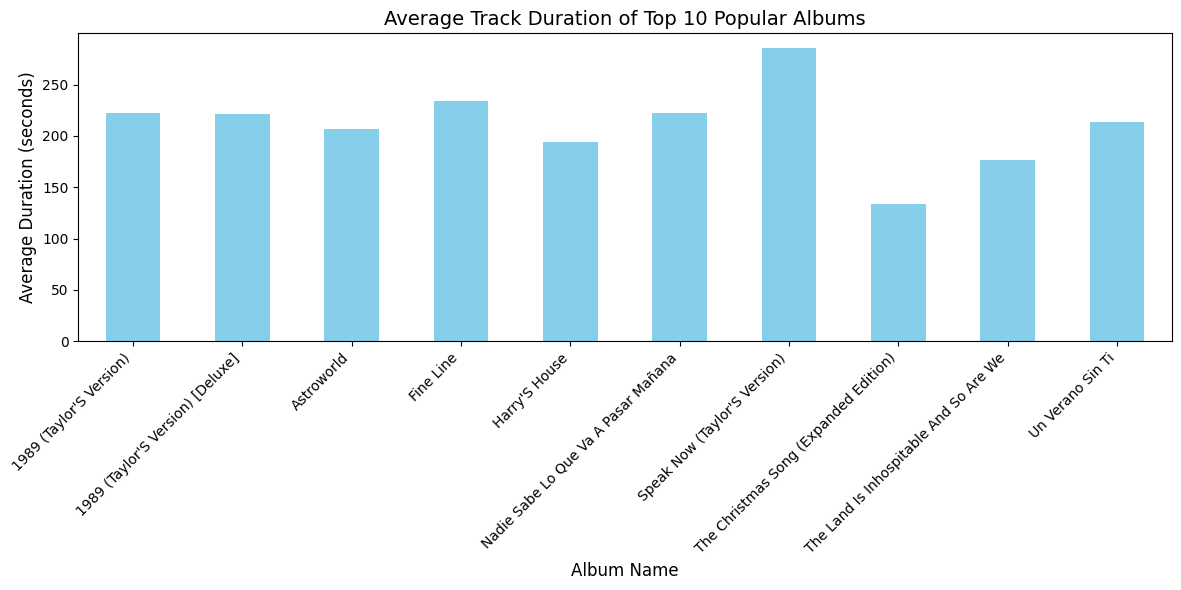

In [ ]:
popular_albums_df = datadf[datadf['album_name'].isin(popular_albums)]

avg_duration_popular_albums = popular_albums_df.groupby('album_name')['duration_sec'].mean()

plt.figure(figsize=(12, 6))
avg_duration_popular_albums.plot(kind='bar', color='skyblue')

plt.title('Average Track Duration of Top 10 Popular Albums', fontsize=14)
plt.xlabel('Album Name', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

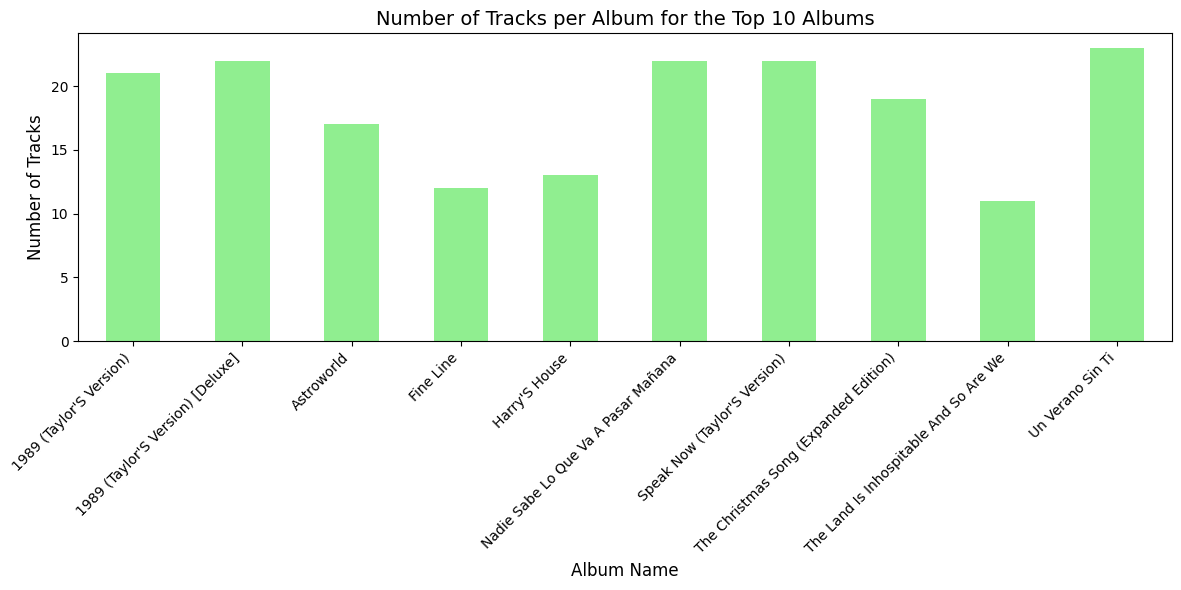

In [ ]:
popular_albums_df = datadf[datadf['album_name'].isin(popular_albums)]

track_count_per_album = popular_albums_df.groupby('album_name')['track_id'].count()

plt.figure(figsize=(12, 6))
track_count_per_album.plot(kind='bar', color='lightgreen')

plt.title('Number of Tracks per Album for the Top 10 Albums', fontsize=14)
plt.xlabel('Album Name', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
datadf.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


In [ ]:
datadf = datadf.sort_values(by='track_popularity',ascending=False)
datadf.head()
top_ten_songs= datadf.head(10)['uri']
top_ten_songs

,uri
374458,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
364635,spotify:track:0bYg9bo50gSsH3LtXe2SQn
361959,spotify:track:3vkCueOmm7xQDoJ17W1Pm3
374139,spotify:track:7iQXYTyuG13aoeHxGG28Nh
374103,spotify:track:4MjDJD8cW7iVeWInc2Bdyj
344602,spotify:track:6uIIdjYTxxpWOyWuVXrKQO
364438,spotify:track:4Dvkj6JhhA12EX05fT7y2e
373279,spotify:track:7MXVkk9YMctZqd1Srtv4MB
374556,spotify:track:1Iq8oo9XkmmvCQiGOfORiz
373398,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW


The top 10 songs are given by these links. We can easily get the songs by pasting these links in the browser.
1. Cruel Summer by Taylor Swift
2. All I Want for Christmas Is You by Mariah Carey
3. My Love Mine All Mine by Mitski
4. PERRO NEGRO by Bad Bunny and Feid
5. MONACO by Bad Bunny
6. 6Que Onda by Calle 24, Chino Pacas, and Fuerza Regida
7. As It Was by Harry Styles
8. Is It Over Now? (Taylor's Version) (From The Vault) by Taylor Swift
9. Starboy by The Weeknd and Daft Punk
10. What Was I Made For? [From The Motion Picture "Barbie"] by Billie Eilish

In [ ]:
datadf.head(5)

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
374458,1NAmidJlEaVgA3MpcPFYGq,Lover,97,album,['Taylor Swift'],Taylor Swift,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,audio_features,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.564,False,99.0,2019.0,August,1
364635,61ulfFSmmxMhc2wCdmdMkN,Merry Christmas,92,album,['Mariah Carey'],Mariah Carey,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,0.350,False,99.0,1994.0,October,1
361959,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable And So Are We,90,album,['Mitski'],Mitski,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/3vkCueOmm7xQ...,audio_features,spotify:track:3vkCueOmm7xQDoJ17W1Pm3,0.121,False,98.0,2023.0,September,1
374139,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,"['Bad Bunny', 'Feid']",Bad Bunny,Feid,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7iQXYTyuG13a...,audio_features,spotify:track:7iQXYTyuG13aoeHxGG28Nh,0.345,True,97.0,2023.0,October,1
374103,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,['Bad Bunny'],Bad Bunny,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4MjDJD8cW7iV...,audio_features,spotify:track:4MjDJD8cW7iVeWInc2Bdyj,0.130,True,96.0,2023.0,October,1


In [ ]:
datadf['artists'] = datadf['artists'].apply(eval)
normalized_df = datadf.explode('artists')

In [ ]:
for artists in normalized_df['artists']:
    print(artists)

Streaming output truncated to the last 5000 lines.
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
Skrilla Skah
Nabula Beats
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
Skrilla Skah
8-Bit Arcade
8-Bit Arcade
Skrilla Skah
Mr. Admire
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-Bit Arcade
8-

In [ ]:
column_counts = normalized_df['artists'].value_counts()
print(column_counts)

artists
Sound Healing Center     4095
Johann Sebastian Bach    2486
Johnny Cash              1825
The Karaoke Channel      1769
Raphael                  1520
                         ... 
S.I.D                       1
Raathee                     1
Justice Pearce              1
Undeceted                   1
Fly 3 Project               1
Name: count, Length: 65689, dtype: int64


The number of tracks for each artsit is given above in the list

In [ ]:
normalized_df.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
374458,1NAmidJlEaVgA3MpcPFYGq,Lover,97,album,Taylor Swift,Taylor Swift,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,audio_features,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.564,False,99.0,2019.0,August,1
364635,61ulfFSmmxMhc2wCdmdMkN,Merry Christmas,92,album,Mariah Carey,Mariah Carey,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,0.350,False,99.0,1994.0,October,1
361959,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable And So Are We,90,album,Mitski,Mitski,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/3vkCueOmm7xQ...,audio_features,spotify:track:3vkCueOmm7xQDoJ17W1Pm3,0.121,False,98.0,2023.0,September,1
374139,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,Bad Bunny,Bad Bunny,Feid,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7iQXYTyuG13a...,audio_features,spotify:track:7iQXYTyuG13aoeHxGG28Nh,0.345,True,97.0,2023.0,October,1
374139,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,Feid,Bad Bunny,Feid,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7iQXYTyuG13a...,audio_features,spotify:track:7iQXYTyuG13aoeHxGG28Nh,0.345,True,97.0,2023.0,October,1


In [ ]:
# Highest Average danceabiliity huh
# for any artist (sum from i to n (dance-i)) / n (I Guess.....?)

In [ ]:
artist_danceability_set = {}
for index, row in normalized_df.iterrows():
    artist = row['artists']
    danceability = row['danceability']
    if artist in artist_danceability_set:
        artist_danceability_set[artist] += danceability
    else:
      artist_danceability_set[artist] = danceability

In [ ]:
# artist_danceability_set -> Containts total danceability
# column_coount -> contains total songs of artist
average_danceability = {}
for artist in artist_danceability_set:
    average_danceability[artist] = artist_danceability_set[artist] / column_counts[artist]

In [ ]:
average_danceability = sorted(average_danceability.items(), key=lambda x: x[1], reverse=True)
average_danceability

[('Bad Bunny', nan),
 ('Robin Sourhorn', 0.989),
 ('Coca Vango', 0.98),
 ('Omeretta the Great', 0.971),
 ('MessyMya', 0.959),
 ('LIL CHRISYY', 0.9575),
 ('UnderHeadz', 0.957),
 ('ScootaSkood', 0.957),
 ('Lars Vaular', 0.954),
 ('Payaso', 0.953),
 ('Dj Fanky Remix', 0.949),
 ('Unique Musick', 0.947),
 ('Rayyan76', 0.945),
 ('Jaeson Ma', 0.944),
 ('R-Mean', 0.9433333333333334),
 ('Manu Rg', 0.942),
 ('DJ Anna Ghellere', 0.942),
 ('Armoa', 0.942),
 ('Rita Thyagarajan', 0.941),
 ('Vell', 0.9396666666666667),
 ('R.S.P.', 0.939),
 ('Huntemann', 0.939),
 ('MO3', 0.938),
 ('Zoe Osama', 0.935),
 ('S.b.g', 0.932),
 ('Technocore', 0.9315),
 ('Meghan', 0.927),
 ('BAALLY', 0.927),
 ('Dash D Cadet', 0.926),
 ('Blackbe', 0.924),
 ('DJ Taj', 0.9235),
 ('Toian', 0.923),
 ('Tate Tucker', 0.921),
 ('Noga Erez', 0.921),
 ('ROUSSO', 0.921),
 ('954mari', 0.92),
 ('Joshua Heath', 0.919),
 ('Kasshy', 0.919),
 ('Babi2fun', 0.916),
 ('C JAMM', 0.915),
 ('BILL STAX', 0.915),
 ('YTN Listeppa', 0.914),
 ('Joi', 0.

In [ ]:
average_danceability = dict(average_danceability)

In [ ]:
average_danceability['Calboy']

0.6628000000000001

In [ ]:
datadf.head()

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
374458,1NAmidJlEaVgA3MpcPFYGq,Lover,97,album,[Taylor Swift],Taylor Swift,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,audio_features,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.564,False,99.0,2019.0,August,1
364635,61ulfFSmmxMhc2wCdmdMkN,Merry Christmas,92,album,[Mariah Carey],Mariah Carey,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,0.350,False,99.0,1994.0,October,1
361959,2Cn1d2KgbkAqbZCJ1RzdkA,The Land Is Inhospitable And So Are We,90,album,[Mitski],Mitski,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/3vkCueOmm7xQ...,audio_features,spotify:track:3vkCueOmm7xQDoJ17W1Pm3,0.121,False,98.0,2023.0,September,1
374139,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,"[Bad Bunny, Feid]",Bad Bunny,Feid,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7iQXYTyuG13a...,audio_features,spotify:track:7iQXYTyuG13aoeHxGG28Nh,0.345,True,97.0,2023.0,October,1
374103,4FftCsAcXXD1nFO9RFUNFO,Nadie Sabe Lo Que Va A Pasar Mañana,100,album,[Bad Bunny],Bad Bunny,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4MjDJD8cW7iV...,audio_features,spotify:track:4MjDJD8cW7iVeWInc2Bdyj,0.130,True,96.0,2023.0,October,1


In [ ]:
datadf.columns

Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'artist_id',
       'duration_sec', 'label', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'explicit', 'track_popularity',
       'release_year', 'release_month', 'rn'],
      dtype='object')

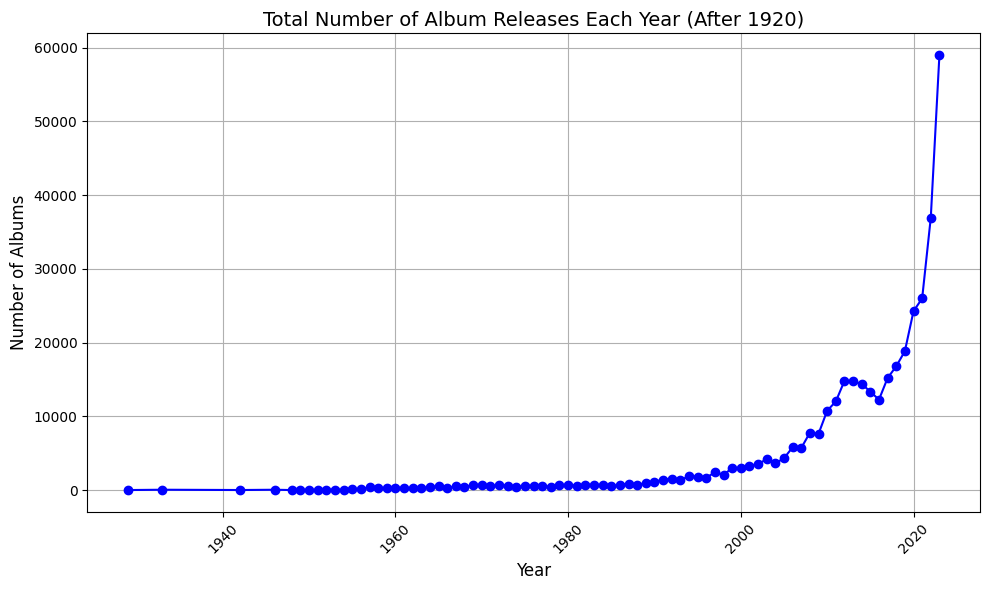

In [ ]:
datadf_filtered = datadf[datadf['release_year'] > 1920]

album_count_by_year = datadf_filtered.groupby('release_year').size()
plt.figure(figsize=(10, 6))
album_count_by_year.plot(kind='line', marker='o', color='b')

plt.title('Total Number of Album Releases Each Year (After 1920)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Albums', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


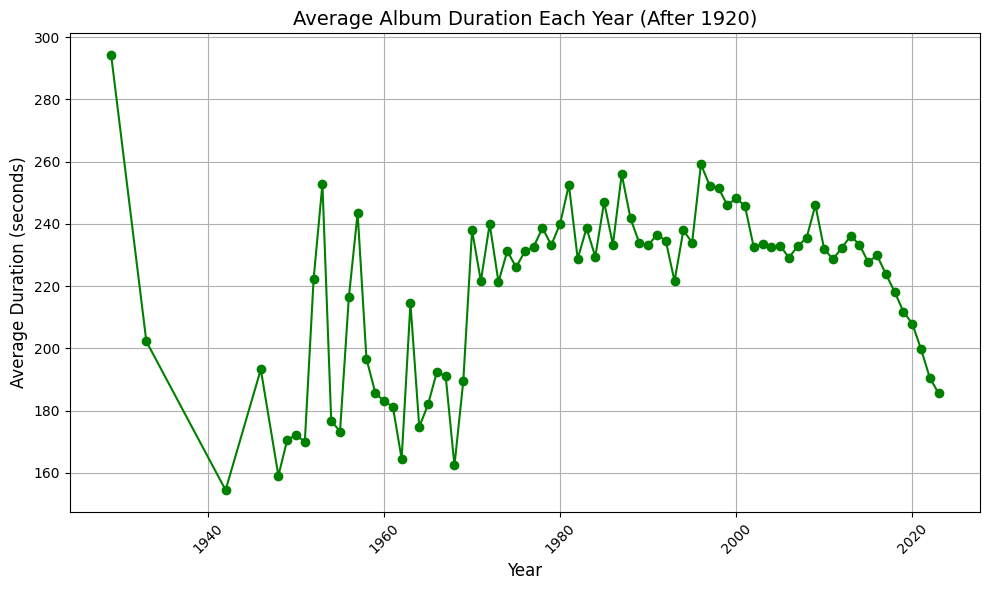

In [ ]:
datadf_filtered = datadf[datadf['release_year'] > 1920]

# Group by 'release_year' and calculate the average album duration in seconds
avg_duration_by_year = datadf_filtered.groupby('release_year')['duration_sec'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
avg_duration_by_year.plot(kind='line', marker='o', color='g')

plt.title('Average Album Duration Each Year (After 1920)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


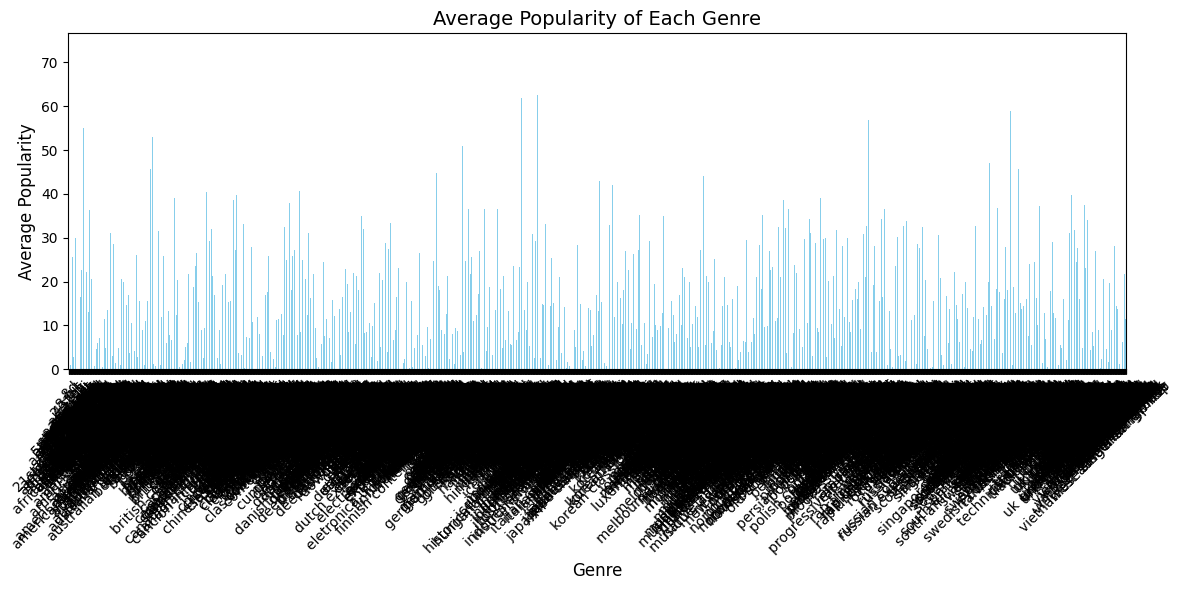

In [ ]:
genre_columns = ['genre_0', 'genre_1', 'genre_2', 'genre_3', 'genre_4']
popularity_column = 'track_popularity'

# Create a new DataFrame where each row has a list of genres and corresponding popularity
genre_popularity = []

for index, row in datadf.iterrows():
    # Get all genres in the row
    genres = [row[genre] for genre in genre_columns if pd.notna(row[genre])]

    # For each genre, append it along with the track's popularity
    for genre in genres:
        genre_popularity.append({'genre': genre, 'popularity': row[popularity_column]})


genre_popularity_df = pd.DataFrame(genre_popularity)
average_popularity = genre_popularity_df.groupby('genre')['popularity'].mean()

plt.figure(figsize=(12, 6))
average_popularity.plot(kind='bar', color='skyblue')

plt.title('Average Popularity of Each Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


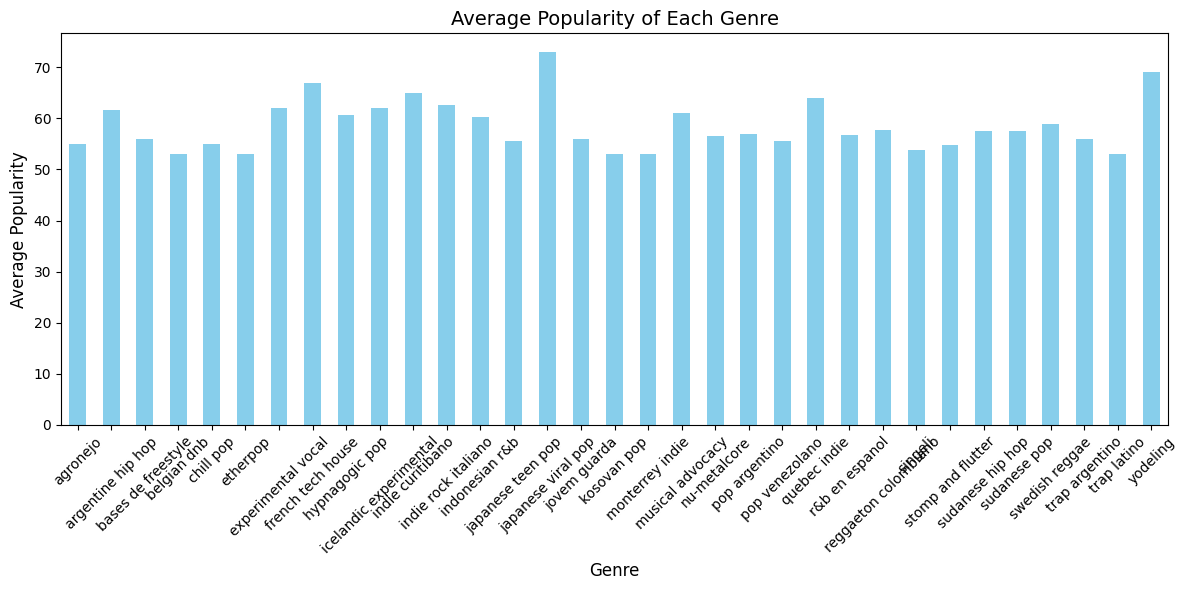

In [ ]:
th = 52
tranculated_genre_popularity = average_popularity[average_popularity > th]
tranculated_genre_popularity
plt.figure(figsize=(12, 6))
tranculated_genre_popularity.plot(kind='bar', color='skyblue')

plt.title('Average Popularity of Each Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()